<a href="https://colab.research.google.com/github/Sirada99/CE888/blob/master/Lab7excercise4whale_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Upload data
from zipfile import ZipFile

file_name = "/content/drive/My Drive/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
import os
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

50722


In [0]:
original_dataset_dir = '/content/train'
base_dir = '/content/train_whale'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_whale_dir = os.path.join(train_dir, 'whale')
os.mkdir(train_whale_dir)

validation_whale_dir = os.path.join(validation_dir, 'whale')
os.mkdir(validation_whale_dir)

test_whale_dir = os.path.join(test_dir, 'whale')
os.mkdir(test_whale_dir)

In [0]:
import shutil
fnames = ['whale ().jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_whale_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['whale ().jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_whale_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['whale ().jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_whale_dir, fname)
    shutil.copyfile(src, dst)
    

In [0]:
print('total training whale images:', len(os.listdir(train_whale_dir)))
print('total validation whale images:', len(os.listdir(validation_whale_dir)))
print('total test whale images:', len(os.listdir(test_whale_dir)))

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 21s 210ms/step - loss: 0.6926 - acc: 0.5235 - val_loss: 0.6749 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6629 - acc: 0.6085 - val_loss: 0.6444 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6238 - acc: 0.6690 - val_loss: 0.5850 - val_acc: 0.7250
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5766 - acc: 0.6980 - val_loss: 0.6375 - val_acc: 0.6350
Epoch 5/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5379 - acc: 0.7280 - val_loss: 0.6107 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 7s 65ms/step - loss: 0.5005 - acc: 0.7600 - val_loss: 0.5713 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 6s 63ms/step - loss: 0.4698 - acc: 0.7795 - val_loss: 0.5985 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 6s 63

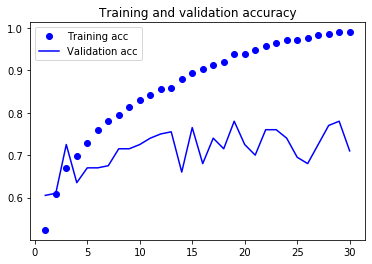

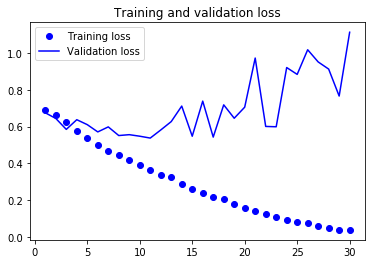

In [0]:
model.save('whale.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 28s 283ms/step - loss: 0.6926 - acc: 0.5275 - val_loss: 0.6818 - val_acc: 0.5812
Epoch 2/20
100/100 [==============================] - 26s 256ms/step - loss: 0.6806 - acc: 0.5606 - val_loss: 0.6608 - val_acc: 0.5979
Epoch 3/20
100/100 [==============================] - 25s 250ms/step - loss: 0.6710 - acc: 0.5756 - val_loss: 0.6885 - val_acc: 0.5387
Epoch 4/20
100/100 [==============================] - 25s 254ms/step - loss: 0.6557 - acc: 0.6116 - val_loss: 0.6353 - val_acc: 0.6237
Epoch 5/20
100/100 [==============================] - 24s 241ms/step - loss: 0.6394 - acc: 0.6219 - val_loss: 0.6510 - val_acc: 0.5952
Epoch 6/20
100/100 [==============================] - 27s 268ms/step - loss: 0.6216 - acc: 0.6503 - val_loss: 0.5976 - val_acc: 0.6669
Epoch 7/20
100/100 [==============================] - 25s 253ms/step - loss: 0.6058 - acc: 0.6653 - val_lo